### Feature Selection with correlation matrix

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Data

In [3]:
data = pd.read_csv("global_heat_index.csv")

In [47]:
# Solar Panel Dataset
data.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533
11,2011,1,1,11,2,21.354047,987.463867,29.157015,12.976929,0.980117,649
12,2011,1,1,12,2,22.161257,986.386169,27.593071,4.777779,1.411915,698


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


### Cleaning Data

 We can observe that there is no solar radiation before 8am and after 5pm therefore we remove those rows from our dataset

In [19]:
clean1 = data[data['Hour']<8]
clean2 = data[data['Hour']>17]
print('Cleaning data from 12:00 am to 7:59 am')
clean1.head(10)

Cleaning data from 12:00 am to 7:59 am


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
5,2011,1,1,5,1,8.098655,985.723206,65.278494,89.290062,1.937899,0
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
24,2011,1,2,0,3,10.231350,984.838196,61.345492,79.954536,2.360912,0
25,2011,1,2,1,3,9.653407,984.457092,63.566375,87.481873,2.193934,0


In [20]:
print('Cleaning data from 18:00 pm to 12:00 am')
clean2.head(10)

Cleaning data from 18:00 pm to 12:00 am


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
18,2011,1,1,18,4,14.728780,986.536682,50.818219,30.906128,2.666706,0
19,2011,1,1,19,4,13.915211,987.175781,52.122064,38.189991,2.709682,0
20,2011,1,1,20,3,13.106395,987.245666,53.782549,45.614468,2.713746,0
21,2011,1,1,21,3,12.326217,986.971375,55.613451,53.939449,2.701125,0
22,2011,1,1,22,3,11.570982,986.042419,57.458358,62.491528,2.639709,0
23,2011,1,1,23,3,10.869849,985.439819,59.446614,71.250389,2.511646,0
42,2011,1,2,18,5,14.914580,986.784424,53.755117,55.795021,2.222224,0
43,2011,1,2,19,5,14.152280,987.563416,54.899280,64.419899,2.399542,0
44,2011,1,2,20,4,13.421063,987.949341,55.893813,73.117203,2.673051,0
45,2011,1,2,21,4,12.687589,987.704529,57.250441,81.467941,2.940782,0


In [21]:
data = data.drop(clean1.index,axis=0)
data = data.drop(clean2.index,axis=0)

In [23]:
data[data['Solar Radiation (GHI)']==0]

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
4880,2011,7,23,8,24,29.698629,973.069519,75.192820,236.097336,2.829032,0
7887,2011,11,25,15,17,28.648593,983.471252,50.726712,67.540367,1.563001,0


In [22]:
data.shape

(7300, 11)

In [25]:
data.describe()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
count,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000
mean,2011.500000,6.526027,15.720548,12.500000,10.981096,31.574868,979.747719,37.275585,196.574439,2.336529,549.648356
std,0.500034,3.448088,8.796850,2.872478,11.361847,7.547733,6.236236,24.016038,99.430842,1.252229,251.884703
min,2011.000000,1.000000,1.000000,8.000000,-28.000000,9.500333,964.755859,0.921771,0.034660,0.030113,0.000000
25%,2011.000000,4.000000,8.000000,10.000000,2.000000,26.819195,974.293610,16.372131,101.827642,1.408638,360.000000
50%,2011.500000,7.000000,16.000000,12.500000,11.000000,31.200264,980.519379,34.036103,233.463554,2.148003,581.000000
75%,2012.000000,10.000000,23.000000,15.000000,22.000000,36.676756,984.940826,55.186414,262.241684,3.090691,755.000000
max,2012.000000,12.000000,31.000000,17.000000,27.000000,52.157927,993.353210,95.018216,359.821167,7.026951,1001.000000


### Input and Output Data

In [26]:
x = data.iloc[:,0:10]
y = data.iloc[:,-1]

In [28]:
# Scaling the Data
# The range of minmax scaler would be from 0 to 1
from sklearn.preprocessing import MinMaxScaler
x = pd.DataFrame(MinMaxScaler().fit_transform(x))

In [29]:
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.000000,0.563636,0.062309,0.809220,0.575834,0.314862,0.201373
1,0.0,0.0,0.0,0.111111,0.563636,0.128112,0.820218,0.491466,0.326007,0.147675
2,0.0,0.0,0.0,0.222222,0.563636,0.221666,0.814713,0.380730,0.201380,0.073688
3,0.0,0.0,0.0,0.333333,0.545455,0.277880,0.794060,0.300067,0.035972,0.135776
4,0.0,0.0,0.0,0.444444,0.545455,0.296804,0.756375,0.283446,0.013183,0.197489


In [30]:
data.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533
11,2011,1,1,11,2,21.354047,987.463867,29.157015,12.976929,0.980117,649
12,2011,1,1,12,2,22.161257,986.386169,27.593071,4.777779,1.411915,698


### Correlation Matrix with Heatmap

In [31]:
corr_matrix = data.corr()

In [32]:
corr_matrix

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
Year,1.000000e+00,2.068091e-13,-5.996177e-14,-9.103344e-15,-0.142833,0.040631,0.022106,-0.176409,0.009151,0.033053,-0.021211
Month,2.068091e-13,1.000000e+00,1.189318e-02,-4.245220e-15,0.499082,-0.076598,-0.036557,0.481862,-0.109259,-0.219805,-0.141898
Day,-5.996177e-14,1.189318e-02,1.000000e+00,-4.405722e-16,-0.017353,-0.011661,0.046357,-0.004710,-0.025499,0.032335,0.017283
Hour,-9.103344e-15,-4.245220e-15,-4.405722e-16,1.000000e+00,-0.013156,0.125397,-0.221522,-0.087896,0.098102,0.037926,-0.229820
Dew Point,-1.428334e-01,4.990818e-01,-1.735319e-02,-1.315618e-02,1.000000,0.149909,-0.577666,0.832862,0.137589,0.091093,-0.027052
Temperature,4.063084e-02,-7.659839e-02,-1.166111e-02,1.253965e-01,0.149909,1.000000,-0.630440,-0.311956,0.423727,0.355959,0.560556
Pressure,2.210594e-02,-3.655655e-02,4.635651e-02,-2.215222e-01,-0.577666,-0.630440,1.000000,-0.290846,-0.411369,-0.475952,-0.167288
Relative Humidity,-1.764092e-01,4.818623e-01,-4.709551e-03,-8.789595e-02,0.832862,-0.311956,-0.290846,1.000000,-0.041060,-0.117996,-0.290220
Wind Direction,9.150838e-03,-1.092589e-01,-2.549903e-02,9.810223e-02,0.137589,0.423727,-0.411369,-0.041060,1.000000,0.231960,0.168490
Wind Speed,3.305348e-02,-2.198049e-01,3.233506e-02,3.792584e-02,0.091093,0.355959,-0.475952,-0.117996,0.231960,1.000000,0.104009


<Axes: >

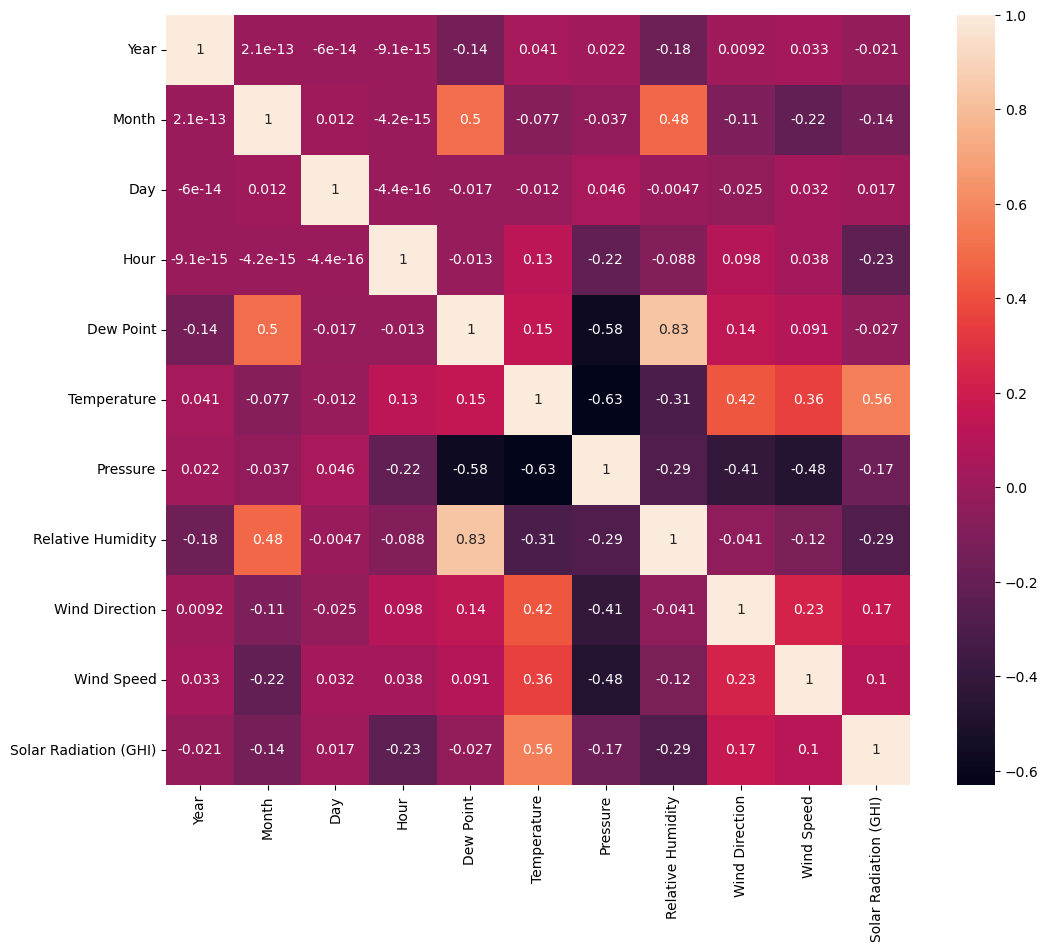

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

### Extra TreeClassifier
Help us to select the important features in our dataset

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [37]:
# Show the importnace of all the features in our dataset
col = ['Year','Month','Day','Hour','Dew Point','Temperature','Pressure','Relative Humidity','Wind Direction','Wind Speed']
feature_imp = pd.Series(model.feature_importances_,index=col)
feature_imp

Year                 0.028167
Month                0.041656
Day                  0.118991
Hour                 0.073405
Dew Point            0.094760
Temperature          0.134043
Pressure             0.130009
Relative Humidity    0.127326
Wind Direction       0.126011
Wind Speed           0.125632
dtype: float64

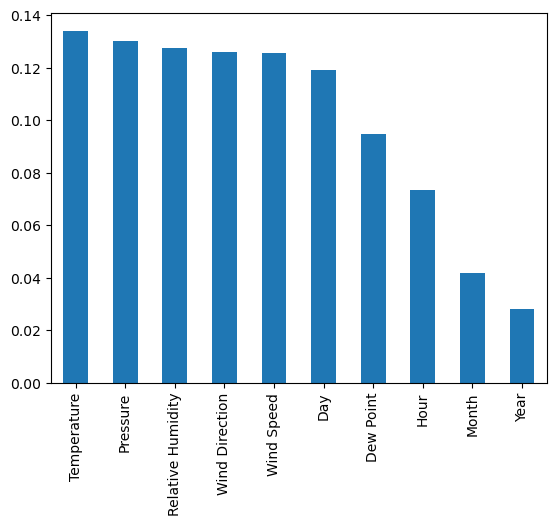

In [38]:
# Visualizing the importance of each parameter
feature_imp.nlargest(10).plot(kind='bar')
plt.show()

### SelectKBest Method

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# chi2 : Hypothesis Testing. Help to find the relationship of diff parameters with Target Parameter
# if chi2 value is small obs value is similar to exp value

In [40]:
# k = no of features that we want
bestfeatures = SelectKBest(score_func=chi2,k=10).fit(x,y)

In [42]:
# Scores assigned to each parameter
scores  = pd.DataFrame(bestfeatures.scores_)
columns = pd.DataFrame(col)

In [44]:
feature_score = pd.concat([columns,scores],axis=1)
feature_score.columns = ['Features','Scores']

In [45]:
feature_score

,Features,Scores
0,Year,504.638066
1,Month,281.323757
2,Day,205.369840
3,Hour,451.137674
4,Dew Point,65.440347
5,Temperature,220.534697
6,Pressure,163.314364
7,Relative Humidity,288.348451
8,Wind Direction,198.103768
9,Wind Speed,135.740161


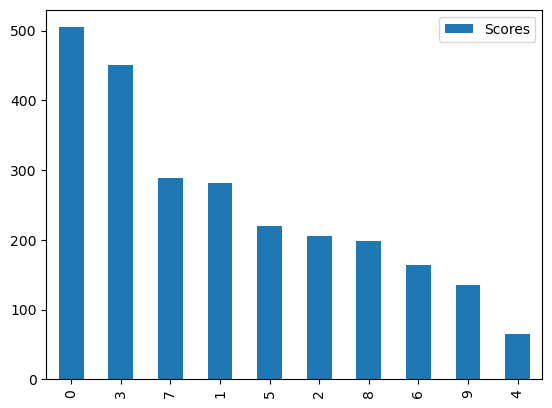

In [46]:
# Visualizing the importance of each parameter
feature_score.nlargest(10,"Scores").plot(kind='bar')
plt.show()